In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X_train = pd.read_csv("../data/interim/train_selected.csv")

In [5]:
X_test = pd.read_csv("../data/interim/test_selected.csv")

In [6]:
y_train = pd.read_csv("../data/interim/y_train.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [7]:
X_train.head()

,MSZoning,Street,LotShape,LandSlope,Neighborhood,HouseStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,...,OverallQual,GrLivArea_capped,TotalBsmtSF_capped,2ndFlrSF,BsmtFinSF1,1stFlrSF_capped,LotArea_capped,GarageArea_capped,YearBuilt,LotFrontage_capped
0,RL,Pave,Reg,Gtl,NAmes,1Story,TA,CBlock,TA,No,...,5,1314.0,1314.0,0,922,1314.0,8400.0,294.0,1957,70.0
1,RL,Pave,IR1,Gtl,Gilbert,2Story,Gd,PConc,Gd,No,...,6,1571.0,799.0,772,0,799.0,7837.0,380.0,1993,59.0
2,RL,Pave,Reg,Gtl,Edwards,1Story,TA,CBlock,Fa,No,...,5,796.0,796.0,0,0,796.0,8777.0,0.0,1910,67.0
3,RL,Pave,Reg,Gtl,SWISU,1.5Fin,TA,BrkTil,Gd,No,...,5,1768.0,731.0,787,569,981.0,7200.0,240.0,1937,60.0
4,RL,Pave,Reg,Gtl,SWISU,1.5Fin,TA,BrkTil,TA,No,...,5,1691.0,1026.0,665,218,1026.0,5000.0,308.0,1924,50.0


In [8]:
X_train.shape

(1168, 28)

In [9]:
y_train

,SalePrice
0,145000
1,178000
2,85000
3,175000
4,127000
...,...
1163,176432
1164,135000
1165,115000
1166,189950


In [10]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# 1. Univariate Analysis

## Categorical data

In [11]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandSlope', 'Neighborhood',
       'HouseStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageType_NoNull'],
      dtype='object')

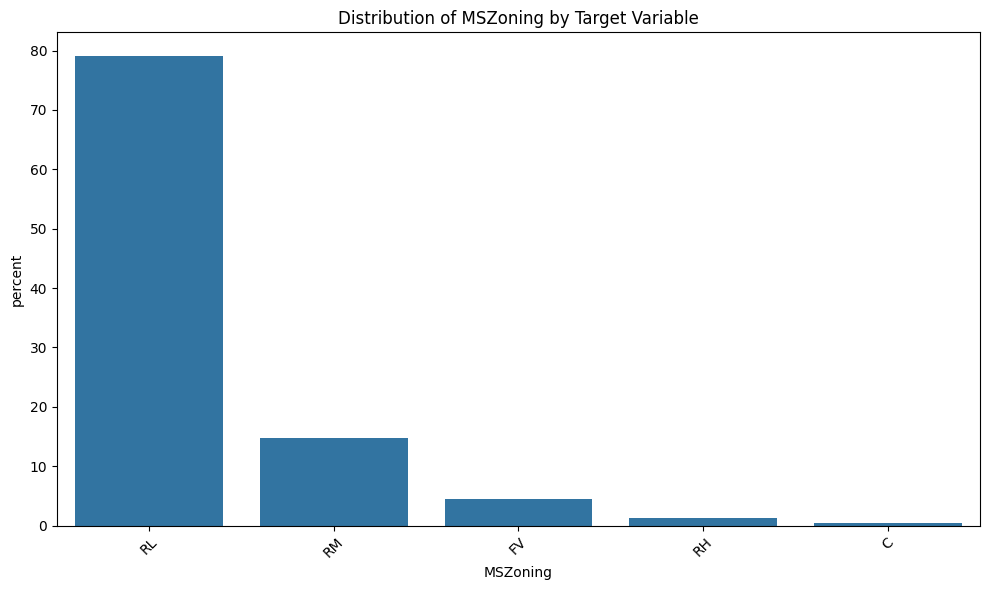

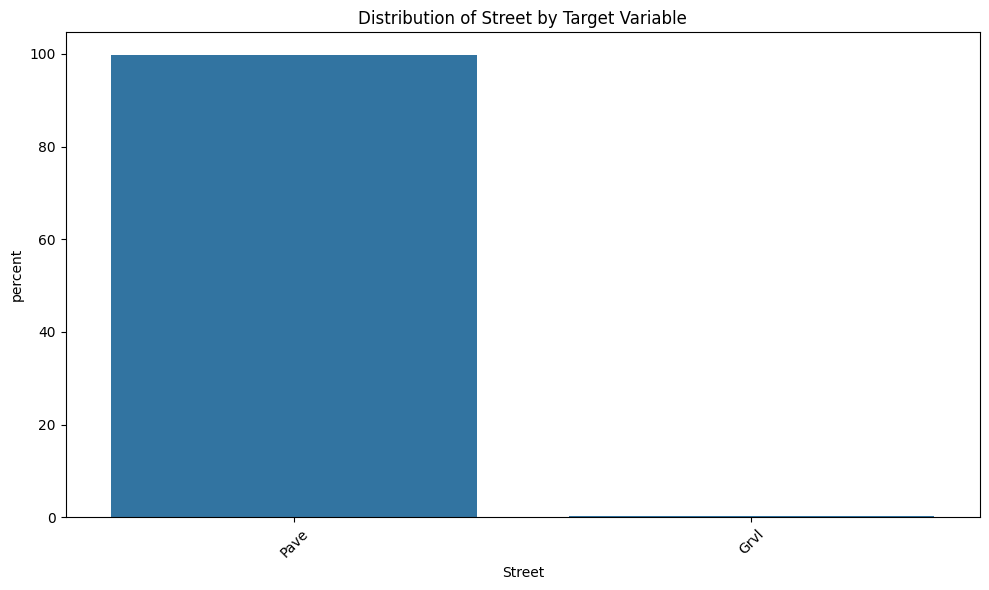

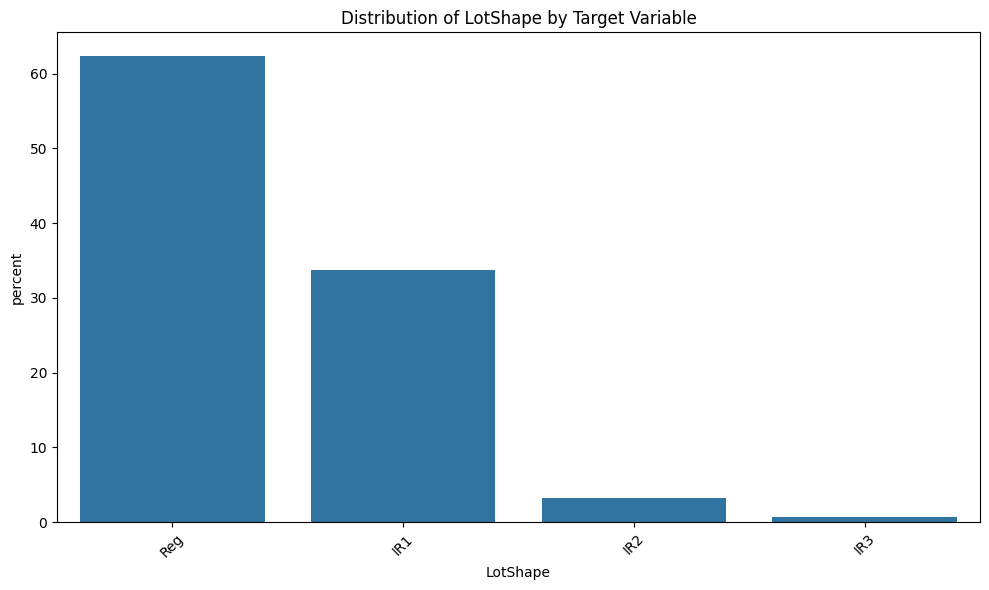

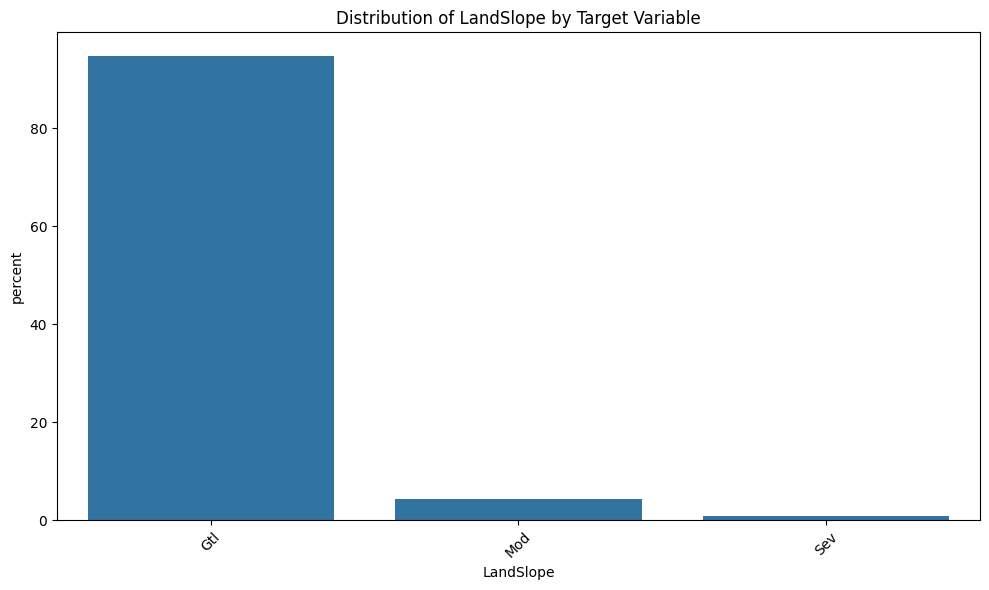

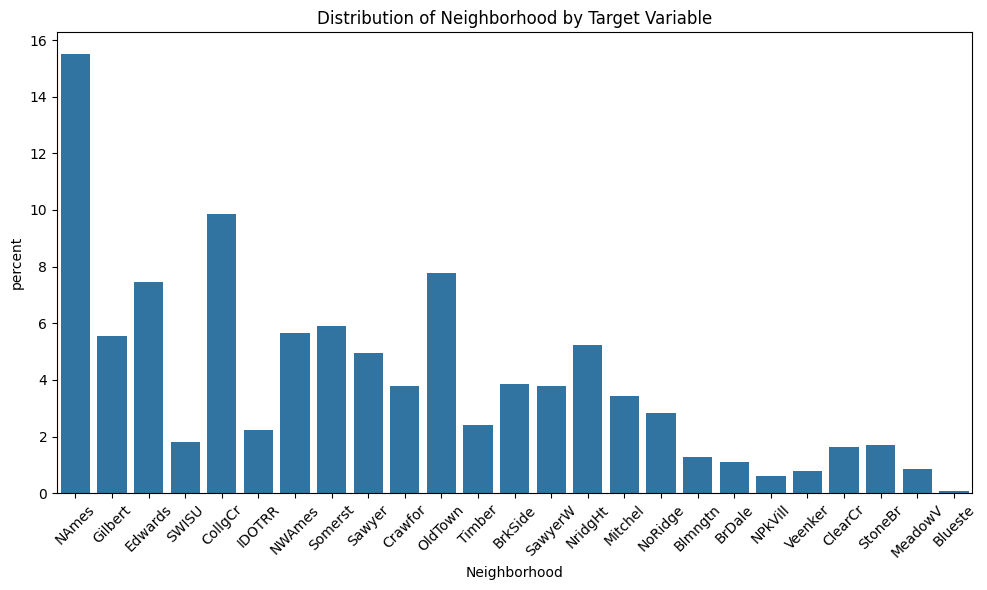

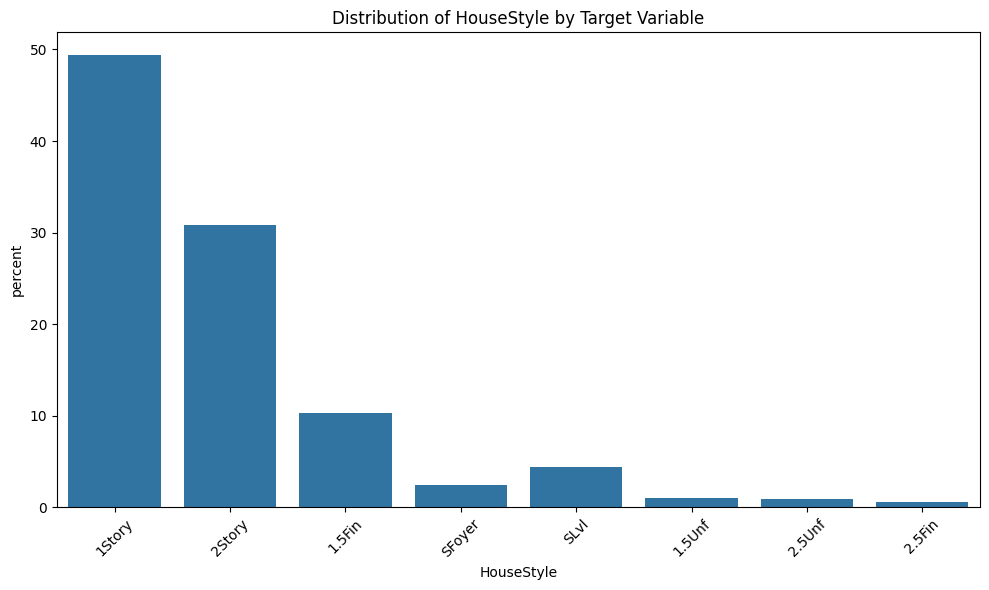

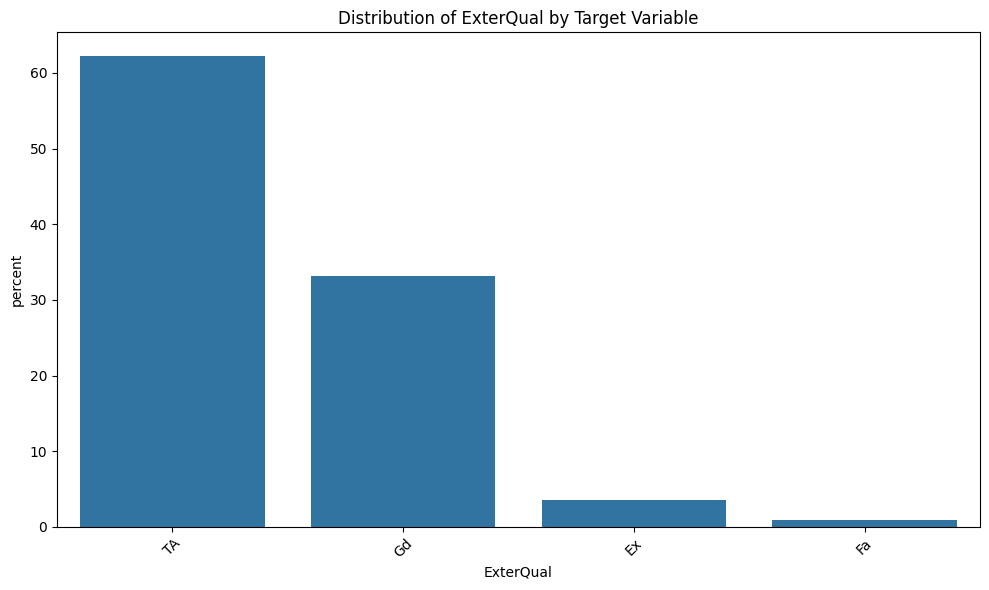

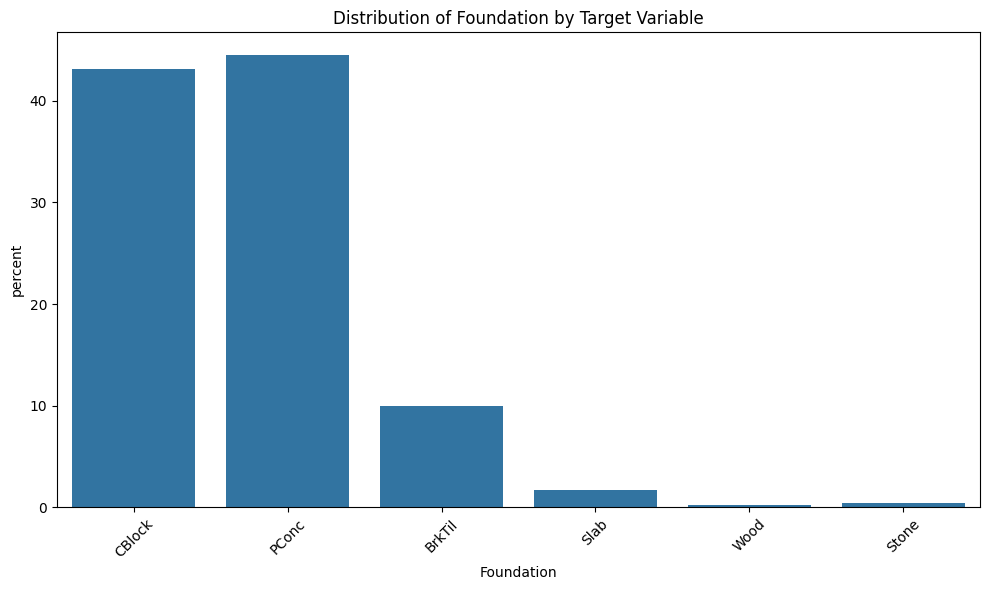

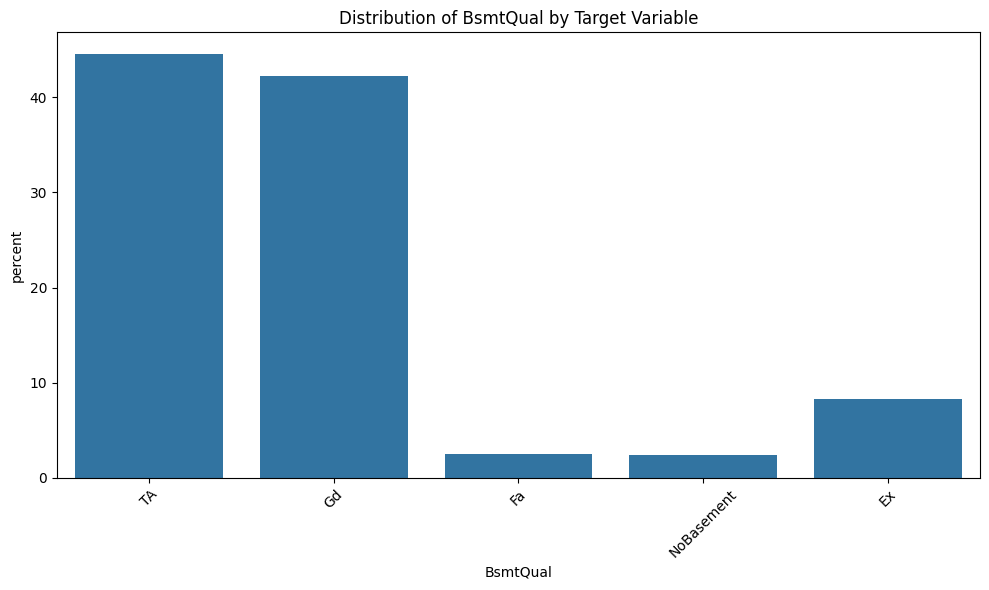

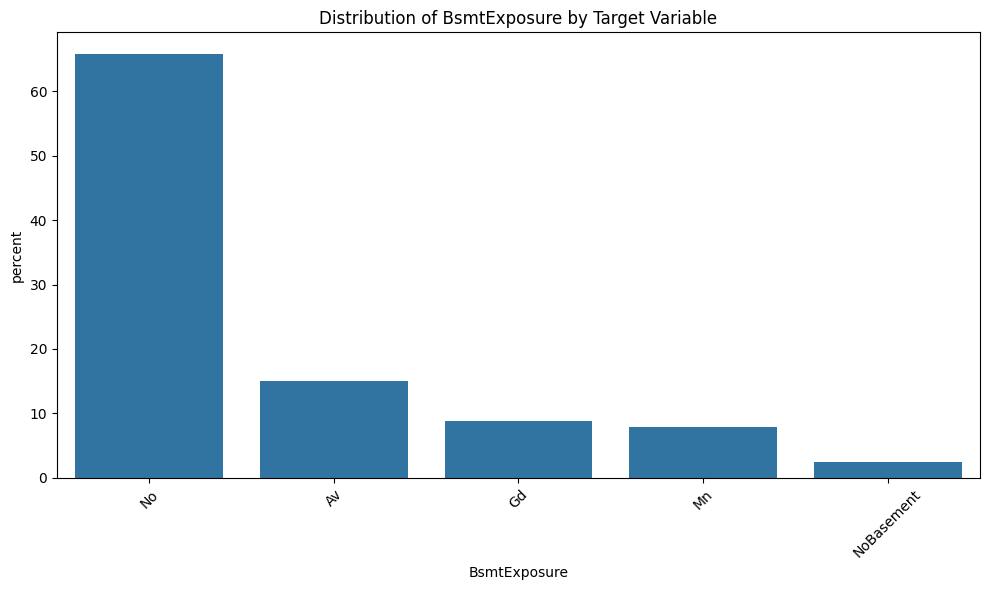

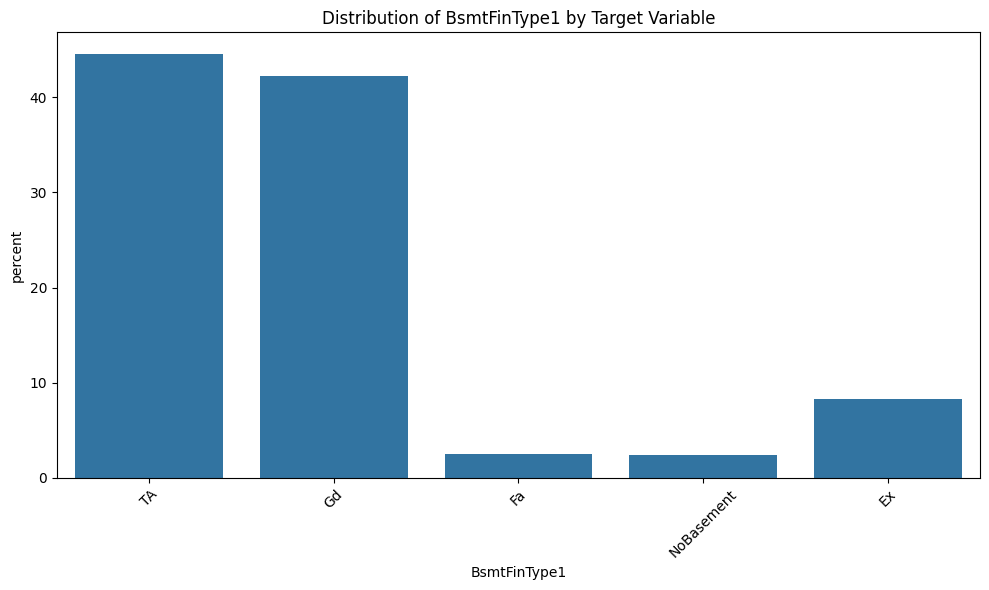

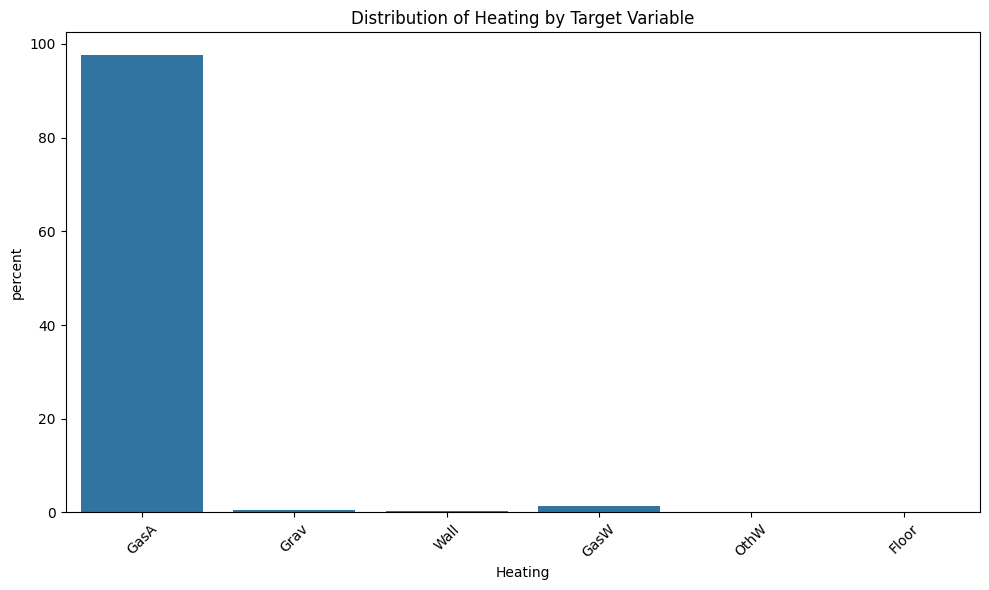

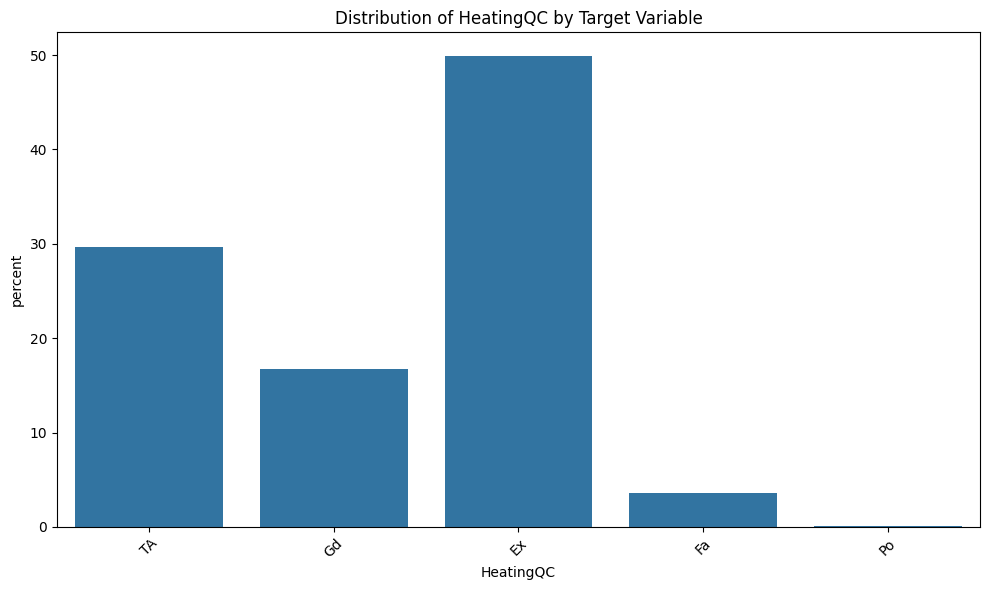

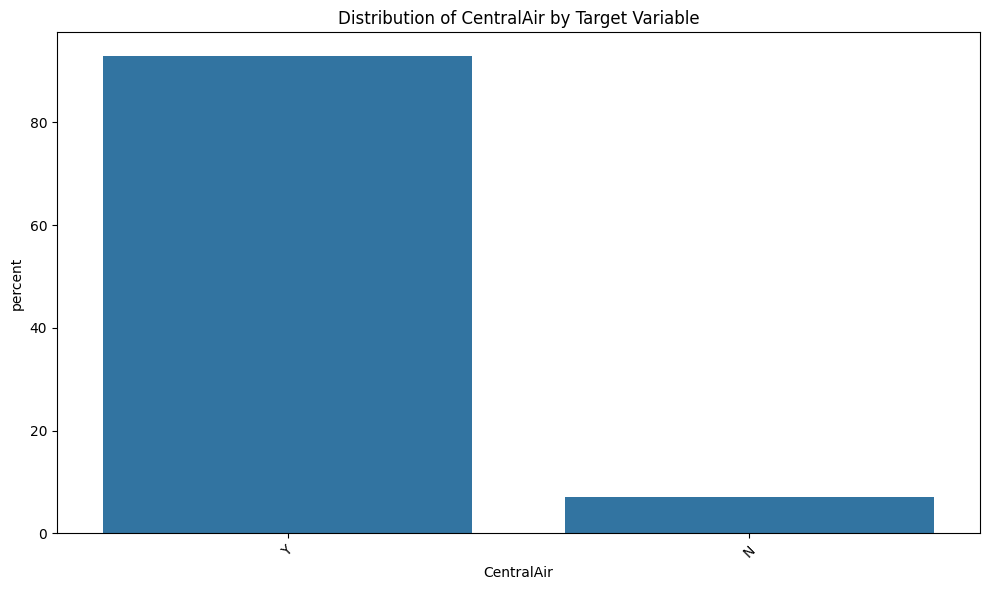

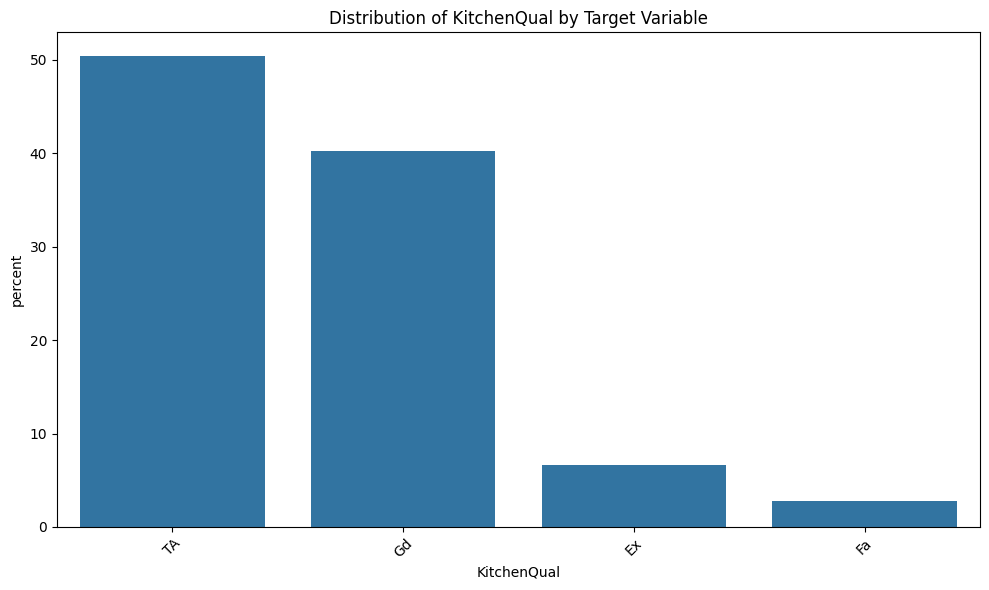

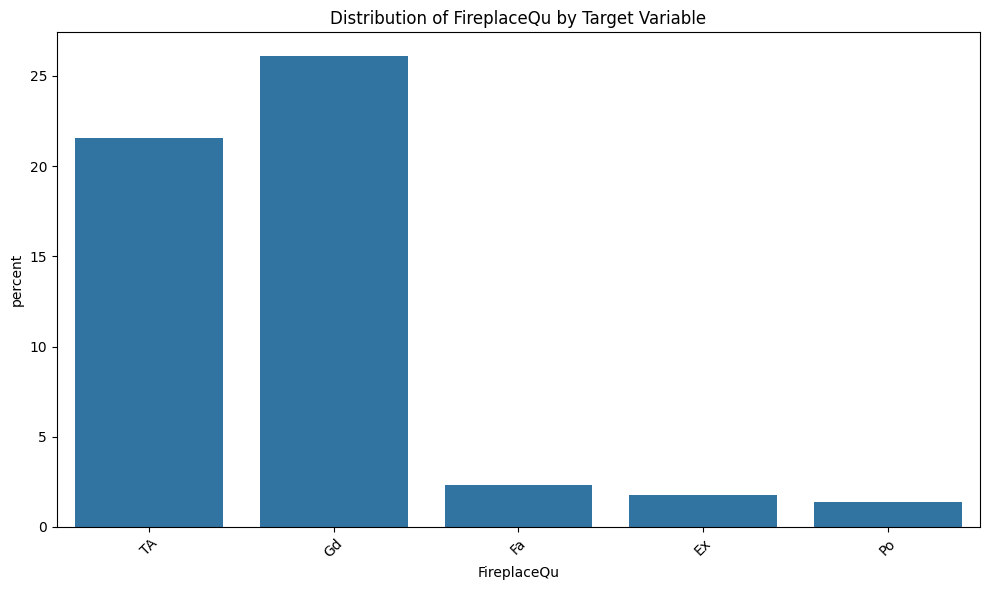

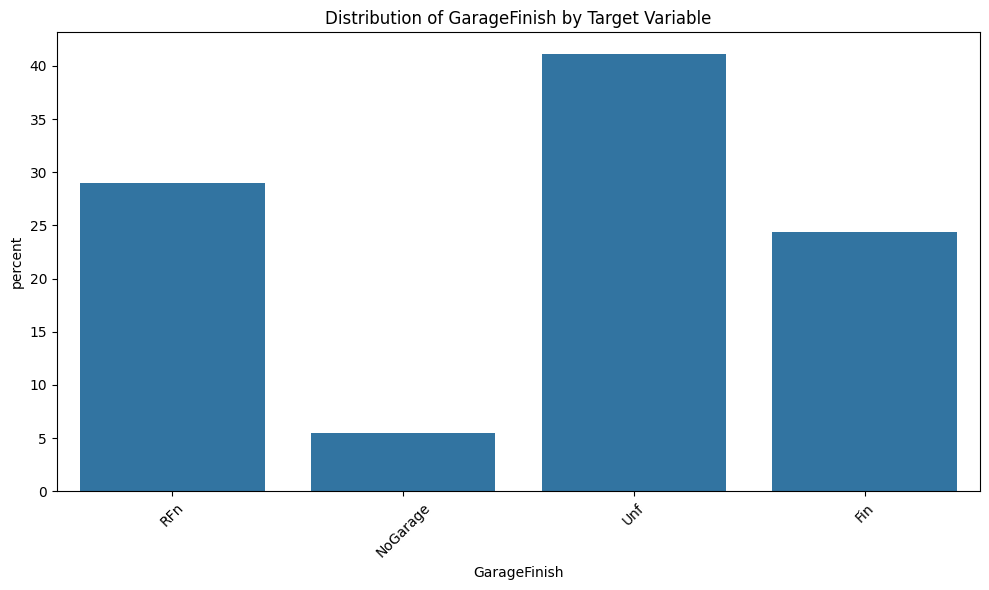

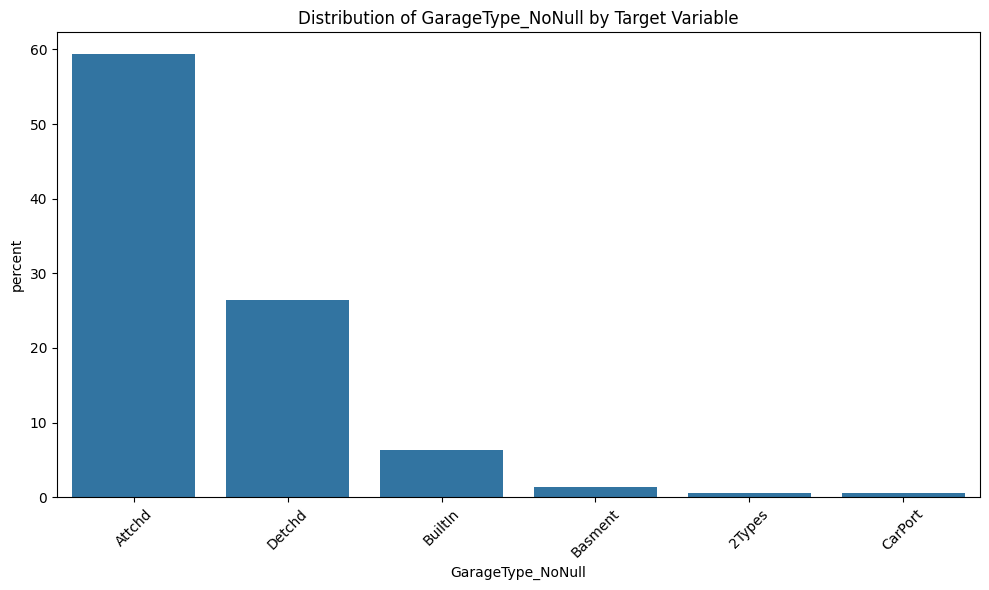

In [12]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train, x=feature, stat = "percent")
    plt.title(f'Distribution of {feature} by Target Variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
X_train.shape, X_test.shape

((1168, 28), (292, 28))

In [14]:
# Dropping less important features based on EDA
X_test.drop(columns= ["Street","BsmtFinType1", "BsmtExposure", "Heating", "CentralAir"], inplace=True)
X_train.drop(columns= ["Street","BsmtFinType1", "BsmtExposure", "Heating", "CentralAir"], inplace=True)

X_train.shape, X_test.shape

((1168, 23), (292, 23))

## Numerical Data

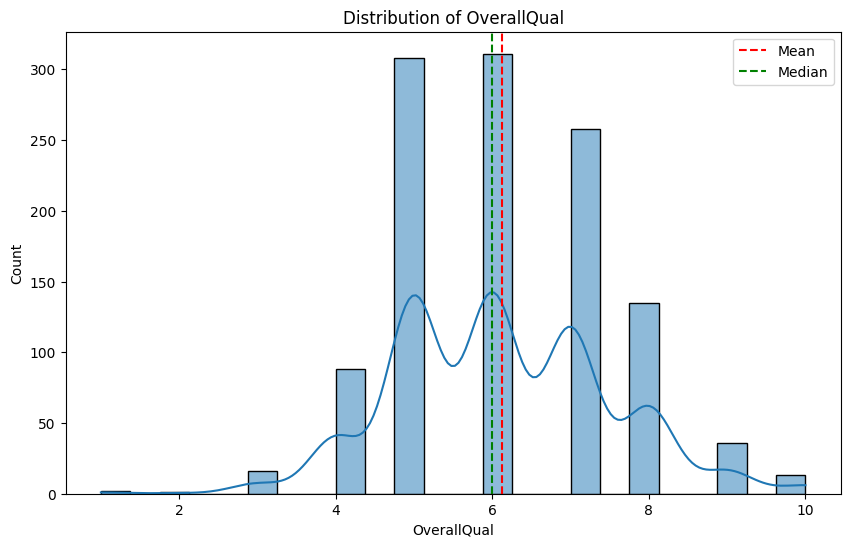

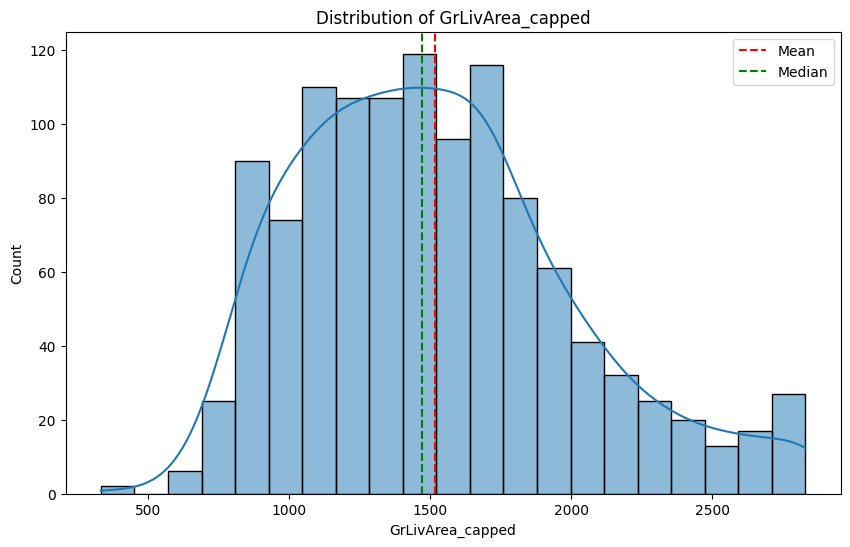

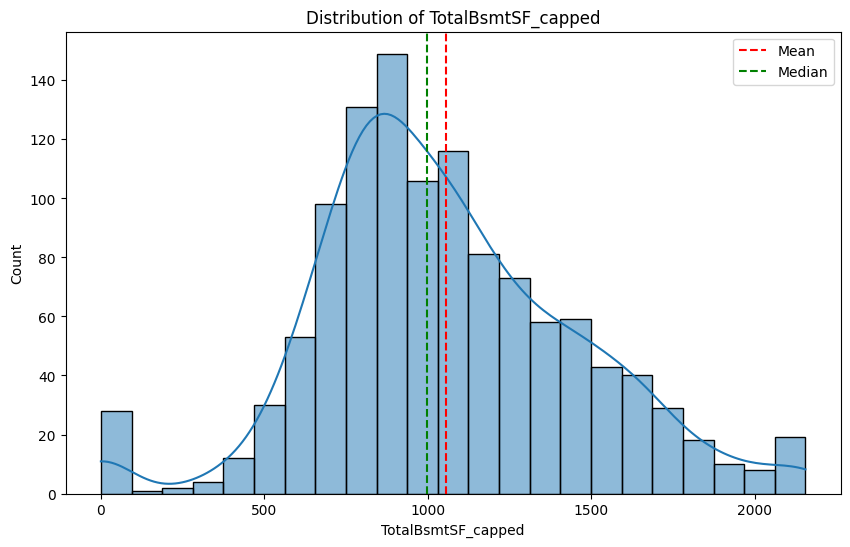

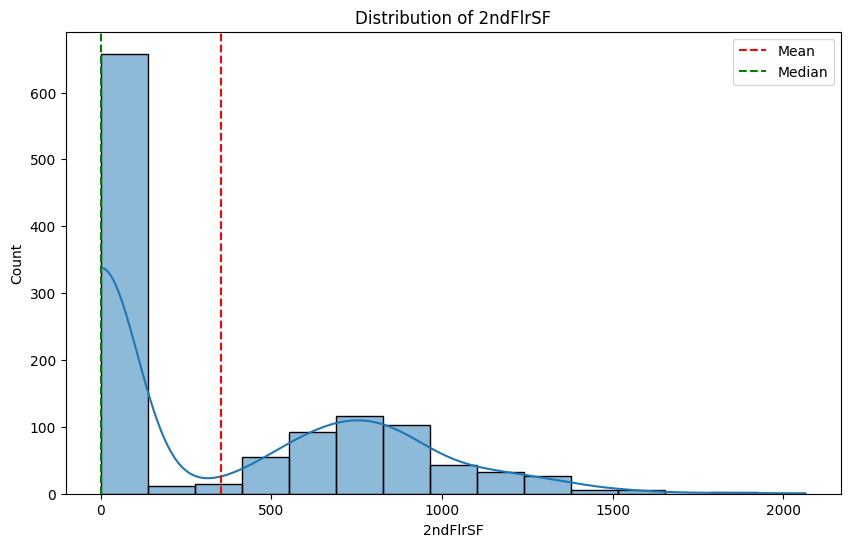

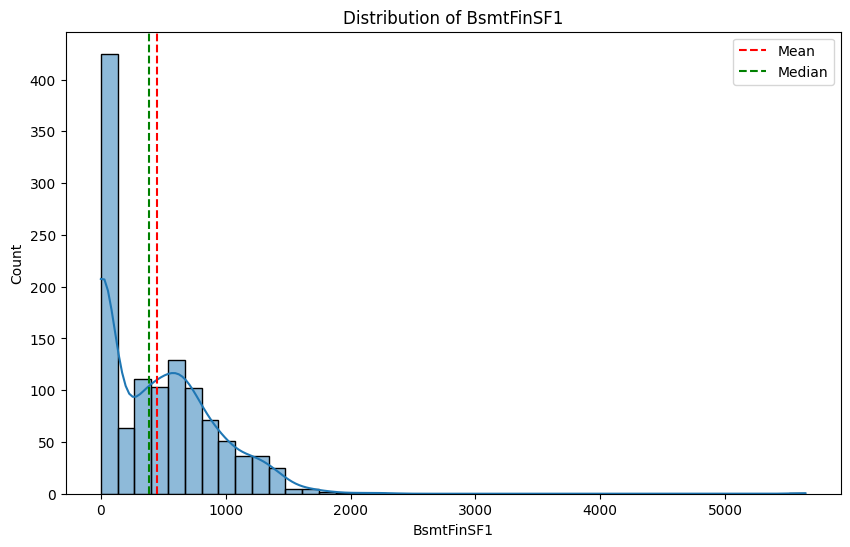

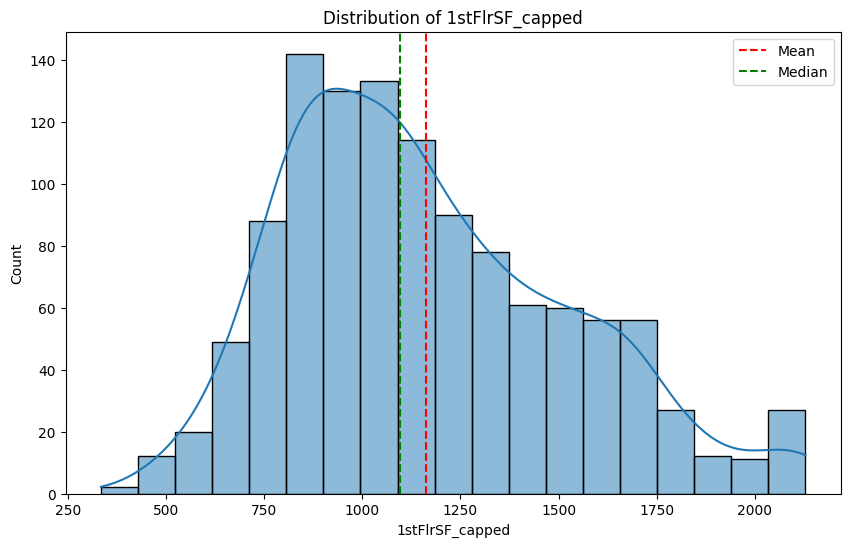

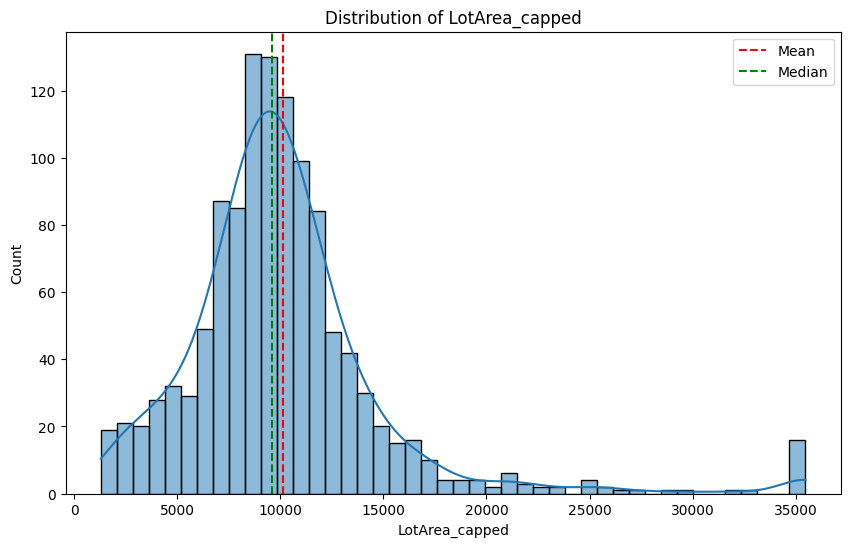

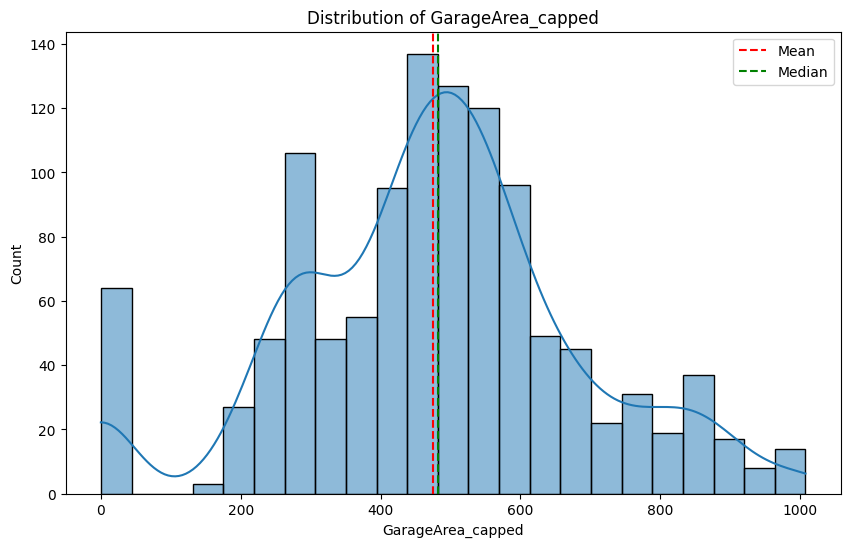

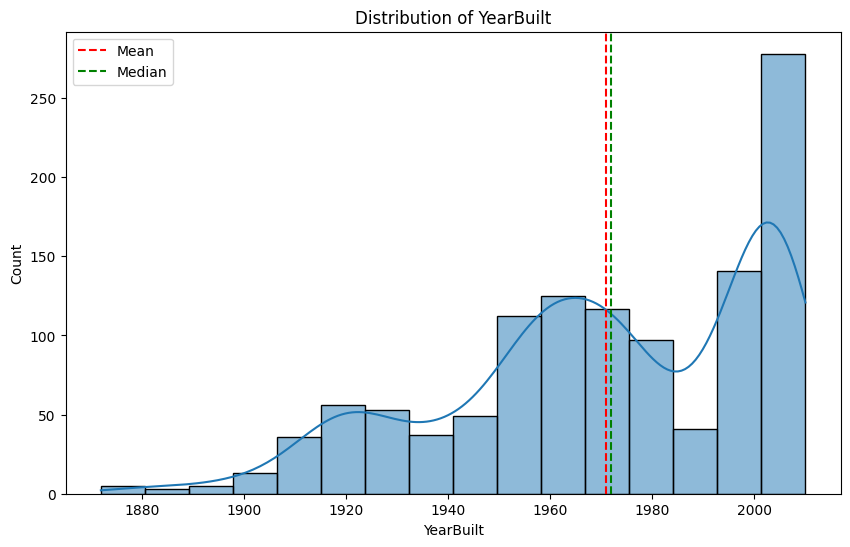

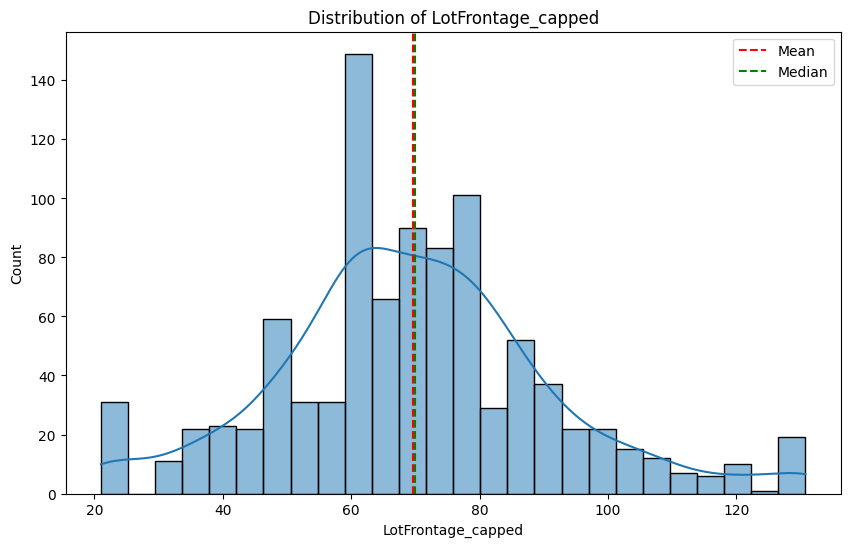

In [15]:
# histogram for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=X_train, x = feature, kde = True)
    plt.axvline(X_train[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(X_train[feature].median(), color='g', linestyle='--', label='Median')
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()